# Machine Learning-Based Cryptocurrencies Investment
## Xin (Andrew) Wei, PhD Candidate
### March 30, 2019
Cryptocurrencies serve as a great alternative asset with non-correlated nature to other assets. The dataset includes prices of Bitcoin (BTC) and Ether (ETH) along with predictions received based on machine learning algorithms. Machine learning predictions were based on asking the following question: "Will a given cryptocurrency go up in the next minute". The task of this report is to generate a diversified trading or investing strategy outperforming the buy-and-hold strategy within the given timeframe using machine learning time series.

## Importing Dataset

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("./20190322_Sample Data_BRA.csv", skiprows = 4)
df.columns = ['TimeStamp', 'ETH_ClosePrice', 'ETH_Prediction', 'BTC_ClosePrice', 'BTC_Prediction']

In [84]:
df.head()

,TimeStamp,ETH_ClosePrice,ETH_Prediction,BTC_ClosePrice,BTC_Prediction
0,1530050400,445.27,-0.450034,6233.41,-0.332632
1,1530050460,445.18,0.037608,6227.92,0.005274
2,1530050520,444.78,0.070381,6229.12,0.002924
3,1530050580,444.80,0.013742,6230.02,0.027043
4,1530050640,442.16,0.000061,6195.23,0.003239


In [85]:
df.tail()

,TimeStamp,ETH_ClosePrice,ETH_Prediction,BTC_ClosePrice,BTC_Prediction
284863,1547156520,129.14,-0.487872,3675.92,-0.331991
284864,1547156580,129.06,-0.487872,3676.41,-0.331991
284865,1547156640,129.09,-0.487872,3676.70,-0.331991
284866,1547156700,129.06,-0.487872,3676.19,-0.331991
284867,1547156760,129.04,-0.487872,3675.93,-0.331991


## Data Cleaning

In [86]:
df.isnull().sum()

TimeStamp          0
ETH_ClosePrice     0
ETH_Prediction    42
BTC_ClosePrice     0
BTC_Prediction    42
dtype: int64

In [87]:
df = df.fillna(0)

## Buy-and-Hold Strategy

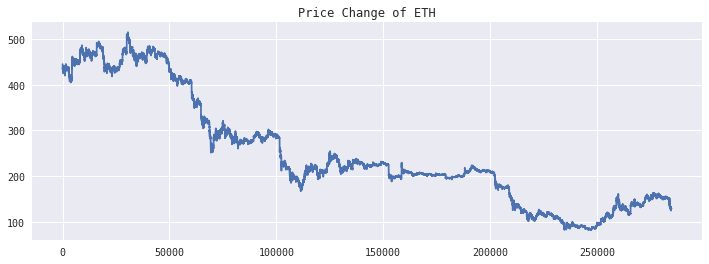

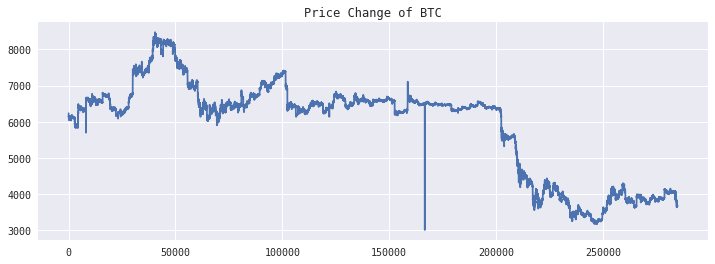

In [88]:
# Plot prices
sns.set(font = 'monospace')
fig1 = df['ETH_ClosePrice'].plot.line(figsize = (12, 4),
        title = 'Price Change of ETH')
plt.show()
fig2 = df['BTC_ClosePrice'].plot.line(figsize = (12, 4),
        title = 'Price Change of BTC')
plt.show()

In [89]:
# Calculate the return of buy-and-hold strategy for each asset
(df.ETH_ClosePrice[284867] - df.ETH_ClosePrice[0])/df.ETH_ClosePrice[0], (df.BTC_ClosePrice[284867] - df.BTC_ClosePrice[0])/df.BTC_ClosePrice[0]

(-0.7101983066454062, -0.41028586279420093)

For buy-and-hold strategy, ETH and BTC have return of -71.02% and -41.03%, respectively. Suppose a fund invests evenly in ETH and BTC, the portfolio return based on buy-and-hold strategy is `-56.03%`.

## ML-Empowered Strategy

In [90]:
# Calculate price return & investment return
df[['ETH_PriceReturn', 'BTC_PriceReturn']] = df[['ETH_ClosePrice', 'BTC_ClosePrice']].diff().shift(periods=-1) / df[['ETH_ClosePrice', 'BTC_ClosePrice']]
df['ETH_Gain'], df['BTC_Gain'] = df['ETH_Prediction'] * df['ETH_ClosePrice'] * df['ETH_PriceReturn'], df['BTC_Prediction'] * df['BTC_ClosePrice'] * df['BTC_PriceReturn']
df = df.fillna(0) # fillin last minute return of NaN with 0

In [91]:
ETH_Gain, BTC_Gain = 0, 0
ETH_LagInvestValue, BTC_LagInvestValue = df['ETH_ClosePrice'].loc[0], df['BTC_ClosePrice'].loc[0]
for row in df.itertuples():
    df.at[row.Index, 'ETH_InvestValue'], df.at[row.Index, 'BTC_InvestValue'] = ETH_LagInvestValue + ETH_Gain, BTC_LagInvestValue + BTC_Gain
    ETH_LagInvestValue, ETH_Gain = df.at[row.Index, 'ETH_InvestValue'], row.ETH_Gain
    BTC_LagInvestValue, BTC_Gain = df.at[row.Index, 'BTC_InvestValue'], row.BTC_Gain

In [92]:
df.head()

,TimeStamp,ETH_ClosePrice,ETH_Prediction,BTC_ClosePrice,BTC_Prediction,ETH_PriceReturn,BTC_PriceReturn,ETH_Gain,BTC_Gain,ETH_InvestValue,BTC_InvestValue
0,1530050400,445.27,-0.450034,6233.41,-0.332632,-0.000202,-0.000881,0.040503,1.826150,445.270000,6233.410000
1,1530050460,445.18,0.037608,6227.92,0.005274,-0.000899,0.000193,-0.015043,0.006329,445.310503,6235.236150
2,1530050520,444.78,0.070381,6229.12,0.002924,0.000045,0.000144,0.001408,0.002632,445.295460,6235.242479
3,1530050580,444.80,0.013742,6230.02,0.027043,-0.005935,-0.005584,-0.036278,-0.940819,445.296867,6235.245111
4,1530050640,442.16,0.000061,6195.23,0.003239,-0.000498,0.001028,-0.000013,0.020631,445.260589,6234.304292


In [93]:
df.tail()

,TimeStamp,ETH_ClosePrice,ETH_Prediction,BTC_ClosePrice,BTC_Prediction,ETH_PriceReturn,BTC_PriceReturn,ETH_Gain,BTC_Gain,ETH_InvestValue,BTC_InvestValue
284863,1547156520,129.14,-0.487872,3675.92,-0.331991,-0.000619,0.000133,0.039030,-0.162676,452.601723,4928.389695
284864,1547156580,129.06,-0.487872,3676.41,-0.331991,0.000232,0.000079,-0.014636,-0.096277,452.640753,4928.227019
284865,1547156640,129.09,-0.487872,3676.70,-0.331991,-0.000232,-0.000139,0.014636,0.169315,452.626117,4928.130742
284866,1547156700,129.06,-0.487872,3676.19,-0.331991,-0.000155,-0.000071,0.009757,0.086318,452.640753,4928.300057
284867,1547156760,129.04,-0.487872,3675.93,-0.331991,0.000000,0.000000,0.000000,0.000000,452.650510,4928.386375


In [94]:
(df['ETH_InvestValue'].iloc[-1] - df['ETH_InvestValue'].iloc[0]) / df['ETH_InvestValue'].iloc[0], (df['BTC_InvestValue'].iloc[-1] - df['BTC_InvestValue'].iloc[0]) / df['BTC_InvestValue'].iloc[0]

(0.016575359202480856, -0.20935950388223826)

My strategy results in 1.66% and -20.94% return for ETH and BTC, outperforming the buy-and-hold strategy of -71.02% and -41.03% return. Suppose a diversified fund investing evenly in ETH and BTC, the portfolio return based on my ML-empowered strategy is `-9.64%`, outperforming the buy-and-hold strategy return of `-56.03%`.